In [31]:
import urllib.request
from tqdm.notebook import tqdm
import six
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt 

In [32]:
url = f'https://auto.ru/'
response = requests.get(url)

<Response [200]>

In [75]:
soup = BeautifulSoup(response.content, 'html.parser')

In [34]:
cars = soup.find_all('a', 'Link IndexSuperMark')
car_brands = [car['title'] for car in cars]
car_urls = [car['href'] for car in cars]
car_name_to_url = dict(zip(car_brands, car_urls))
car_name_to_url

{'LADA (ВАЗ)': 'https://auto.ru/cars/vaz/all/',
 'BMW': 'https://auto.ru/cars/bmw/all/',
 'Chevrolet': 'https://auto.ru/cars/chevrolet/all/',
 'Hyundai': 'https://auto.ru/cars/hyundai/all/',
 'Kia': 'https://auto.ru/cars/kia/all/',
 'Mercedes-Benz': 'https://auto.ru/cars/mercedes/all/',
 'Nissan': 'https://auto.ru/cars/nissan/all/',
 'Renault': 'https://auto.ru/cars/renault/all/',
 'Toyota': 'https://auto.ru/cars/toyota/all/',
 'Volkswagen': 'https://auto.ru/cars/volkswagen/all/'}

In [10]:
car_names = []
car_prices = []
car_urls = []
for car_brand in car_brands:
    car_name_url = car_name_to_url[car_brand]
    car_soup = BeautifulSoup(requests.get(car_name_url).content, 'html.parser')
    car_soup_html = car_soup.find_all('script')
    script = json.loads(car_soup_html[0].string)
    car_list = script['offers']['offers']
    for car in car_list:
        if 'price' in car and 'url' in car and 'name' in car:
            car_price = car['price']
            car_url = car['url']
            car_name = car['name']
            car_names.append(car_name)
            car_prices.append(car_price)
            car_urls.append(car_url)
            print(car_url)
            print(car_name)
            print(car_price)

https://auto.ru/cars/used/sale/vaz/xray/1104250966-944081d4/
LADA (ВАЗ) XRAY I
719990
https://auto.ru/cars/used/sale/vaz/2115/1104223963-d661ab5d/
LADA (ВАЗ) 2115
115000
https://auto.ru/cars/used/sale/vaz/2131_4x4/1103992807-78fa254f/
LADA (ВАЗ) 2131 (4x4)  I Euro 5
545000
https://auto.ru/cars/new/group/vaz/vesta/21686555/21718239/1103829895-2ba0a46f/
LADA (ВАЗ) Vesta I SW
930900
https://auto.ru/cars/used/sale/vaz/21099/1104622578-6b4dfa40/
LADA (ВАЗ) 21099
55000
https://auto.ru/cars/used/sale/vaz/2104/1104208405-8dc87e2c/
LADA (ВАЗ) 2104
100000
https://auto.ru/cars/used/sale/vaz/granta/1104622256-be851e56/
LADA (ВАЗ) Granta I Рестайлинг
530000
https://auto.ru/cars/used/sale/vaz/largus/1103674908-5c213407/
LADA (ВАЗ) Largus I
519000
https://auto.ru/cars/used/sale/vaz/largus/1104622550-4ad9e497/
LADA (ВАЗ) Largus I
630000
https://auto.ru/cars/new/group/vaz/vesta/21686555/21718308/1103775043-61952c98/
LADA (ВАЗ) Vesta I SW
959900
https://auto.ru/cars/used/sale/vaz/2170/1104622548-fe76ef6

In [11]:
df = pd.DataFrame(
    {
        'car_names' : car_names,
        'car_prices' : car_prices,
        'car_urls' : car_urls
    }
)
df

,car_names,car_prices,car_urls
0,LADA (ВАЗ) XRAY I,719990,https://auto.ru/cars/used/sale/vaz/xray/110425...
1,LADA (ВАЗ) 2115,115000,https://auto.ru/cars/used/sale/vaz/2115/110422...
2,LADA (ВАЗ) 2131 (4x4) I Euro 5,545000,https://auto.ru/cars/used/sale/vaz/2131_4x4/11...
3,LADA (ВАЗ) Vesta I SW,930900,https://auto.ru/cars/new/group/vaz/vesta/21686...
4,LADA (ВАЗ) 21099,55000,https://auto.ru/cars/used/sale/vaz/21099/11046...
...,...,...,...
365,Volkswagen Tiguan II Рестайлинг,1654898,https://auto.ru/cars/new/group/volkswagen/tigu...
366,Volkswagen Amarok I Рестайлинг,3695500,https://auto.ru/cars/used/sale/volkswagen/amar...
367,Volkswagen Tiguan II Рестайлинг,2180598,https://auto.ru/cars/new/group/volkswagen/tigu...
368,Volkswagen Polo V,530000,https://auto.ru/cars/used/sale/volkswagen/polo...


In [35]:
car_names = []
car_prices = []
car_images = []
car_body_types = []
car_engine_displacement = []
car_engine_power = []
car_vehicle_transmission = []
brands = []
for car_brand in car_brands:
    car_name_url = car_name_to_url[car_brand]
    car_soup = BeautifulSoup(requests.get(car_name_url).content, 'html.parser')
    car_soup_html = car_soup.find_all('script')
    i = 0
    for car_script in car_soup_html:
        if i == 0:
            i = 1
        else:
            script = json.loads(car_script.string)
            try:
                script = json.loads(car_script.string)
            except:
                break
            if 'name' not in script:
                break
            name = script['name']
            brand = script['brand']
            bodyType = script['bodyType']
            image = script['image']['contentUrl']
            vehicleTransmission = script['vehicleTransmission']
            engineDisplacement = float(script['vehicleEngine']['engineDisplacement'][0 : 3])
            enginePower = int(script['vehicleEngine']['enginePower'][0 : -4])
            description = script['image']['description']
            l = (description.find('цене'))
            r = (description.find('рублей'))
            if r != -1:
                price = int(description[l + 5 : r - 1].replace('\xa0', ''))
                car_names.append(name)
                car_prices.append(price)
                car_images.append(image)
                brands.append(brand)
                car_body_types.append(bodyType)
                car_engine_displacement.append(engineDisplacement)
                car_engine_power.append(enginePower)
                car_vehicle_transmission.append(vehicleTransmission)

In [36]:
df = pd.DataFrame(
    {
        'Название' : car_names,
        'Цена, руб.' : car_prices,
        'Тип автомобиля' : car_body_types,
        'Объем двигателя, LTR' : car_engine_displacement,
        'Мощность двигателя, N12' : car_engine_power,
        'Коробка передач' : car_vehicle_transmission,
        'Брэнд' : brands,
        'Фото' : car_images,
    }
)
df

,Название,"Цена, руб.",Тип автомобиля,"Объем двигателя, LTR","Мощность двигателя, N12",Коробка передач,Брэнд,Фото
0,LADA (ВАЗ) Vesta I SW,873900,универсал 5 дв.,1.6,106,механическая,VAZ,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
1,LADA (ВАЗ) Kalina II,390000,хэтчбек 5 дв.,1.6,87,механическая,VAZ,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
2,LADA (ВАЗ) Kalina II,390000,универсал 5 дв.,1.6,106,роботизированная,VAZ,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
3,LADA (ВАЗ) Vesta I SW,930900,универсал 5 дв.,1.6,113,вариатор,VAZ,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
4,LADA (ВАЗ) Granta I,359990,лифтбек,1.6,87,механическая,VAZ,https://avatars.mds.yandex.net/get-autoru-vos/...
...,...,...,...,...,...,...,...,...
362,Volkswagen Polo V,399000,седан,1.6,105,механическая,VOLKSWAGEN,https://avatars.mds.yandex.net/get-autoru-vos/...
363,Volkswagen Tiguan II Рестайлинг,1654898,внедорожник 5 дв.,1.4,150,роботизированная,VOLKSWAGEN,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
364,Volkswagen Polo V Рестайлинг,880000,седан,1.6,110,автоматическая,VOLKSWAGEN,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...
365,Volkswagen Tiguan II,1899900,внедорожник 5 дв.,1.4,150,роботизированная,VOLKSWAGEN,https://autoru.naydex.net/L1Jcx7801/fa9ef5xUyI...


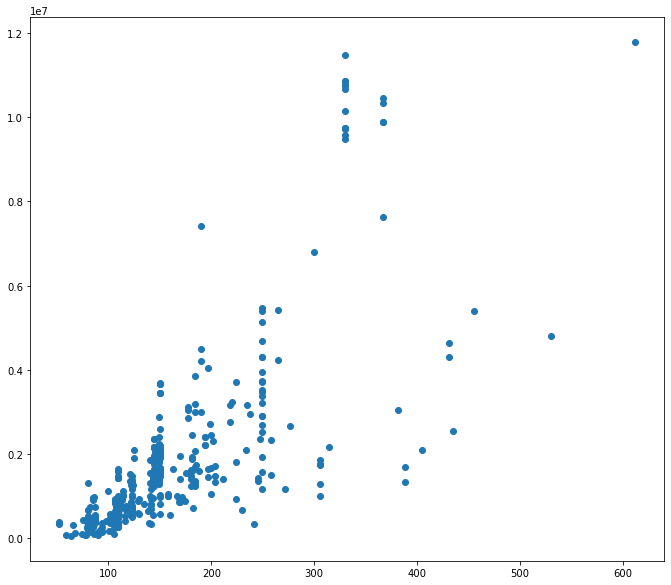

In [74]:
fig = plt.figure()
fig.set_size_inches(25, 10)
x = df['Мощность двигателя, N12']
y = df['Цена, руб.']
ax = fig.add_subplot(121)
ax.scatter(x, y)
plt.show()

Видно, что большинство дешевых машин имеют мощность меньше 300, более того для них цена примерно пропорциональна мощности, а самые дорогие машины имеют мощность в промежутке от 300 до 400 N12.

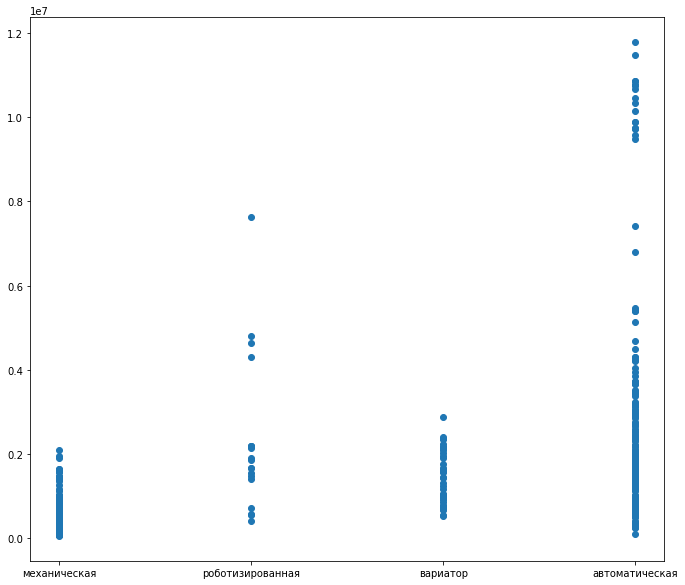

In [70]:
fig = plt.figure()
fig.set_size_inches(25, 10)
x = df['Коробка передач']
y = df['Цена, руб.']
ax = fig.add_subplot(121)
ax.scatter(x, y)
plt.show()

По этому графику видно, что автоматическая коробка передач самая популярная и охватывает весь ценовой дипазон, тогда как механическая и вариатор бывают только у машин дешевле 3 млн руб. 

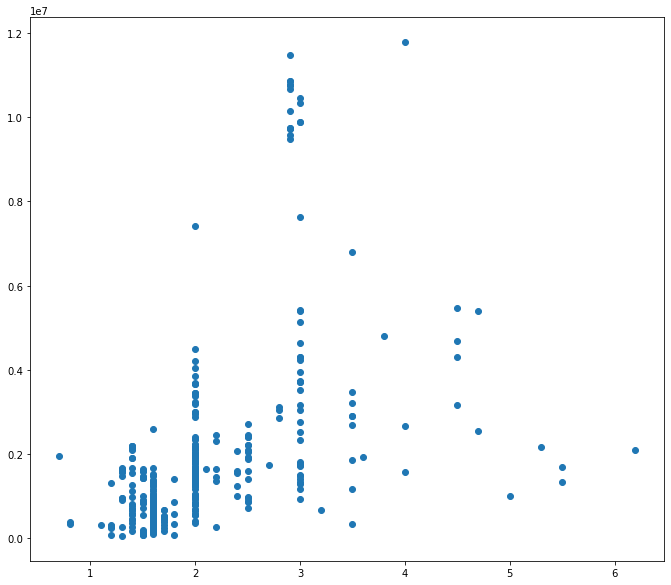

In [69]:
fig = plt.figure()
fig.set_size_inches(25, 10)
x = df['Объем двигателя, LTR']
y = df['Цена, руб.']
ax = fig.add_subplot(121)
ax.scatter(x, y)
plt.show()

In [ ]:
По этому графику видно, что у самых дешевых машин, как правило маленький объем двигателя, тогда как дорогие машины чаще всего
бывают трехлитровыми.

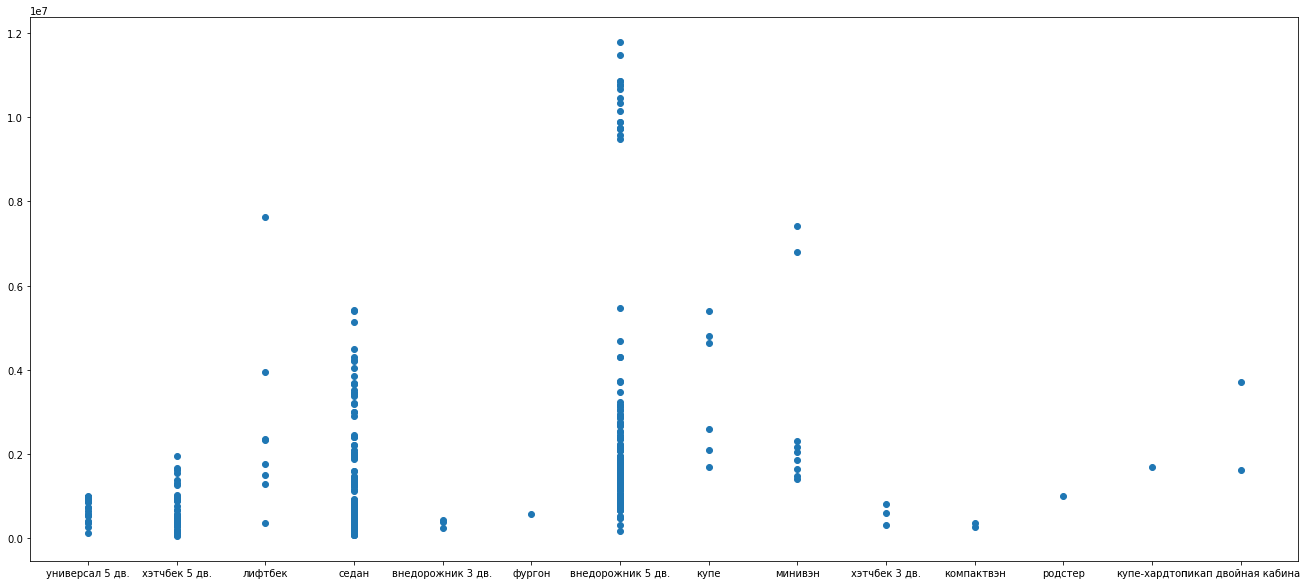

In [67]:
fig = plt.figure()
fig.set_size_inches(50, 10)
x = df['Тип автомобиля']
y = df['Цена, руб.']
ax = fig.add_subplot(121)
ax.scatter(x, y)
plt.show()

In [68]:
df['Тип автомобиля'].value_counts()[:14].index.tolist()

['внедорожник 5 дв.',
 'седан',
 'хэтчбек 5 дв.',
 'универсал 5 дв.',
 'минивэн',
 'лифтбек',
 'купе',
 'внедорожник 3 дв.',
 'хэтчбек 3 дв.',
 'пикап двойная кабина',
 'компактвэн',
 'купе-хардтоп',
 'фургон',
 'родстер']

In [ ]:
Самые распространенные типы автомобилей это внедорожник, седан и хэтчбэк, а самые нераспространенные это купе-хардтоп, фургон
и родстер. Самые дорогие типы это внедорожник, лифтбэк и минивэн. 


In [61]:
df['Коробка передач'].value_counts()[:5].index.tolist()

['автоматическая', 'механическая', 'вариатор', 'роботизированная']

Самые популярные коробки передач это автоматическая, механическая, самая непопулярная это роботизированная.

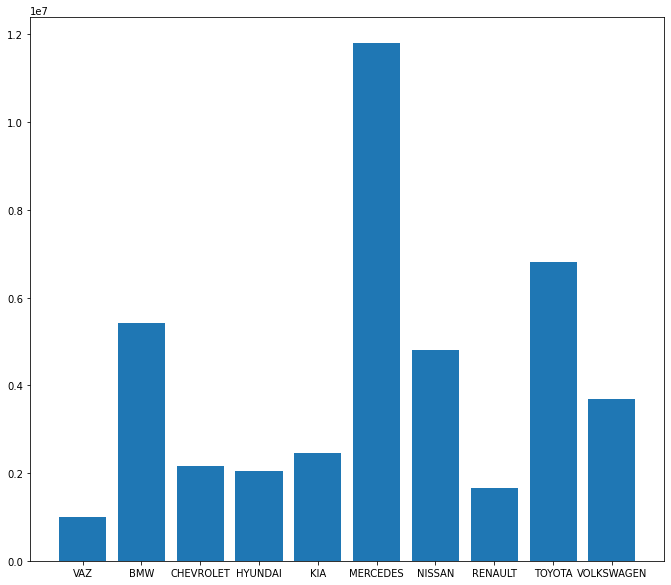

In [60]:
fig = plt.figure()
fig.set_size_inches(25, 10)
x = df['Брэнд']
y = df['Цена, руб.']
ax = fig.add_subplot(121)
ax.bar(x, y)
plt.show()

По этому графику можно сделать вывод, что самые дорогие брэнды на auto.ru это Mercedec, Toyota, BMW, а самые дешевые это VAZ, Renault, Hyundai.